## Риск выдачи кредита 💵

Задание: Скоринговая модель для микрофинансирования — Разработайте кредитный
скоринг для людей без кредитной истории, используя альтернативные данные (мобильные платежи, социальные сети). Исследуйте этичность алгоритмов, проверьте
модель на дискриминацию по полу/возрасту, изучите interpretability через SHAP.

Dataset 'German Credit Risk'

Ссылка на Kaggle: 'https://www.kaggle.com/datasets/uciml/german-credit'

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve

In [178]:
data = pd.read_csv('german_credit_risk.csv')
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [179]:
data = data.drop(columns='Unnamed: 0')

In [180]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [181]:
data.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [183]:
data['Saving accounts'] = data['Saving accounts'].fillna('unknown')
data['Checking account'] = data['Checking account'].fillna('unknown')

In [184]:
data.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [185]:
categorii = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

In [186]:
ler = LabelEncoder()
for el in categorii:
    data[el] = ler.fit_transform(data[el])

In [187]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,4,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,3,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0


# Визуализация числовых признаков и карелляционая сетка 📊

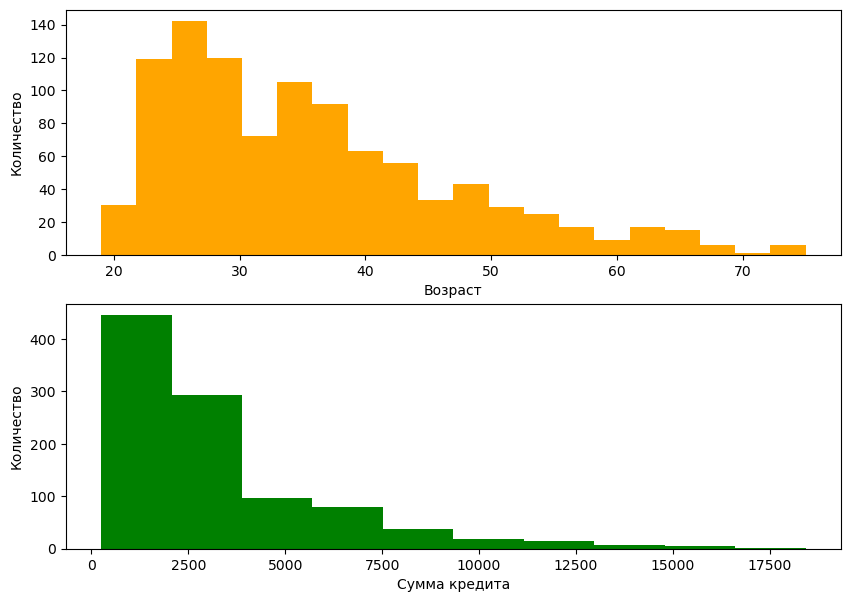

In [189]:
fig = plt.figure(figsize=(10,7))
ax1 = plt.subplot(211)
plt.hist(data['Age'], bins=20, color='orange')
plt.xlabel('Возраст')
plt.ylabel('Количество')

ax2 = plt.subplot(212)
plt.hist(data['Credit amount'], color='green')
plt.xlabel('Сумма кредита')
plt.ylabel('Количество')

plt.show()

Можно заметить, что в основном берут кредит люди после в 25 лет

И что сумма кредита часто маленькая, видимо для быстрых покупок

<Axes: >

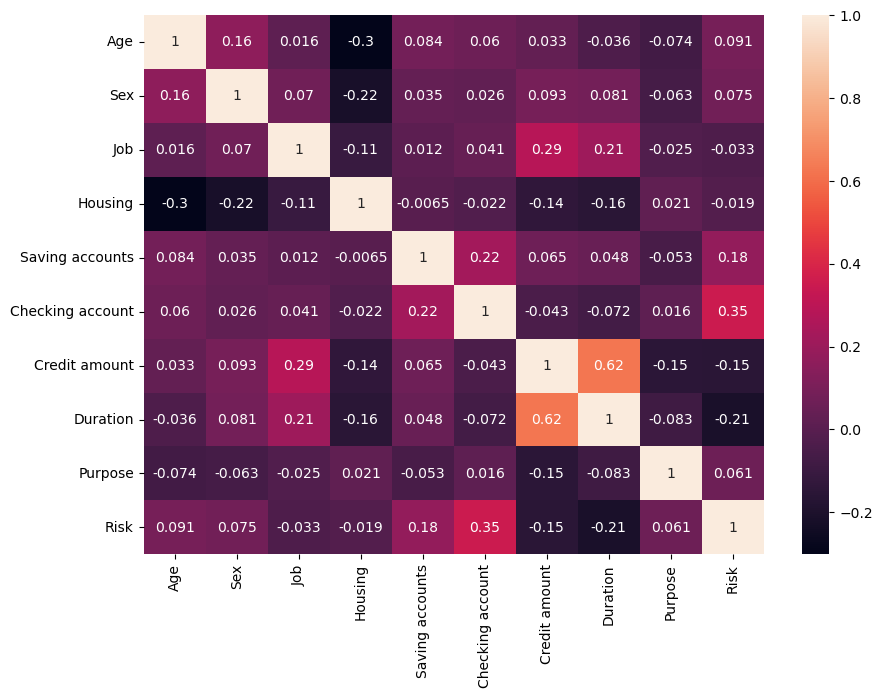

In [192]:
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)
sns.heatmap(data.corr(), annot=True)

# Разделение датасета на test и train

In [210]:
X = data.drop('Risk', axis=1)
y = data['Risk']

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [222]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Обучение модели

In [234]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [236]:
y_pred = model.predict(X_test)

In [271]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy {accuracy:.3f}')
print(f'F1: {f1:.3f}')
print('confussion matrix:\n', conf_matrix)

Accuracy 0.723
F1: 0.819
confussion matrix:
 [[ 29  62]
 [ 21 188]]


In [279]:
y_proba = model.predict_proba(X_test)[:,1]

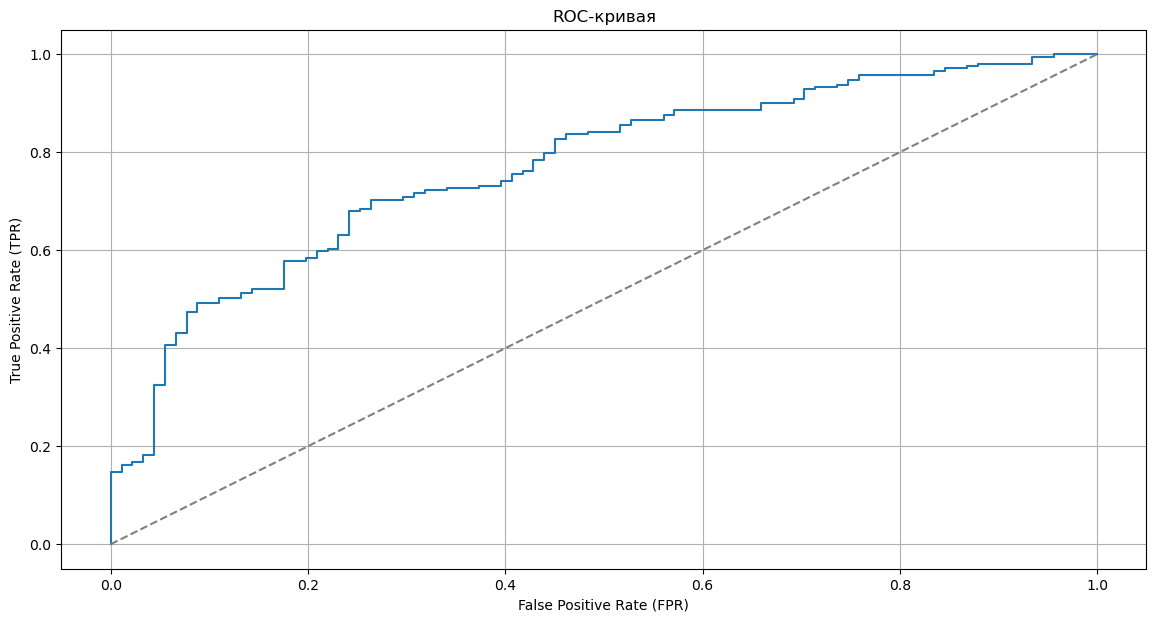

AUC: 0.7689678742310321


In [297]:
fig = plt.figure(figsize=(14,7))
ax = plt.subplot(111)

fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr,tpr)
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая')
plt.grid(True)
plt.show()

print('AUC:', auc)

Для неоптемизированной модели это нормальные показатели

In [300]:
tn, fp, fn, tp = conf_matrix.ravel()
print(f'Верно предсказано: {tp + tn}')
print(f'НЕВерно предсказано: {fp + fn}')

Верно предсказано: 217
НЕВерно предсказано: 83


In [304]:
import shap

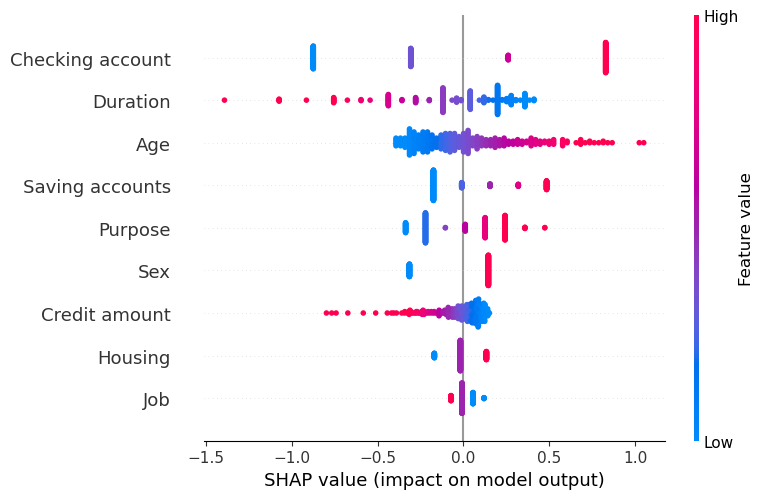

In [308]:
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=data.columns)

Age: Для Age много красных точека справа, это означает, что при большом возрасте человека, его вклад в предсказание увеличивается
И синие точки слева, значит вносит низкое значение в предсказание
Sex: У нас только два разных значения - Мужской/Женский пол. На графике видно, что кредит больше дают люядм женского пола, но не сильно больше, это, вомзожно, может быть связано с датасетом, то есть женщин больше мужчин.
Вывод: Возраст человека влияет на предсказание модели, а пол человека не влияет.